Checking for missing values:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Training samples: 16512
Testing samples: 4128
Training Linear Regression...
Linear Regression trained. MSE: 0.5559, R2: 0.5758

Training Decision Tree...
Decision Tree trained. MSE: 0.4943, R2: 0.6228

Training Random Forest...
Random Forest trained. MSE: 0.2555, R2: 0.8050

Training Gradient Boosting...
Gradient Boosting trained. MSE: 0.2940, R2: 0.7756

Training Support Vector Regressor...
Support Vector Regressor trained. MSE: 0.3552, R2: 0.7289

Model Performance Summary:
                      Model  Mean Squared Error  R² Score
0         Linear Regression            0.555892  0.575788
1             Decision Tree            0.494272  0.622811
2             Random Forest            0.255498  0.805024
3         Gradient Boosting            0.293999  0.775643
4  Support Vector Regressor            0.355198  0.728941


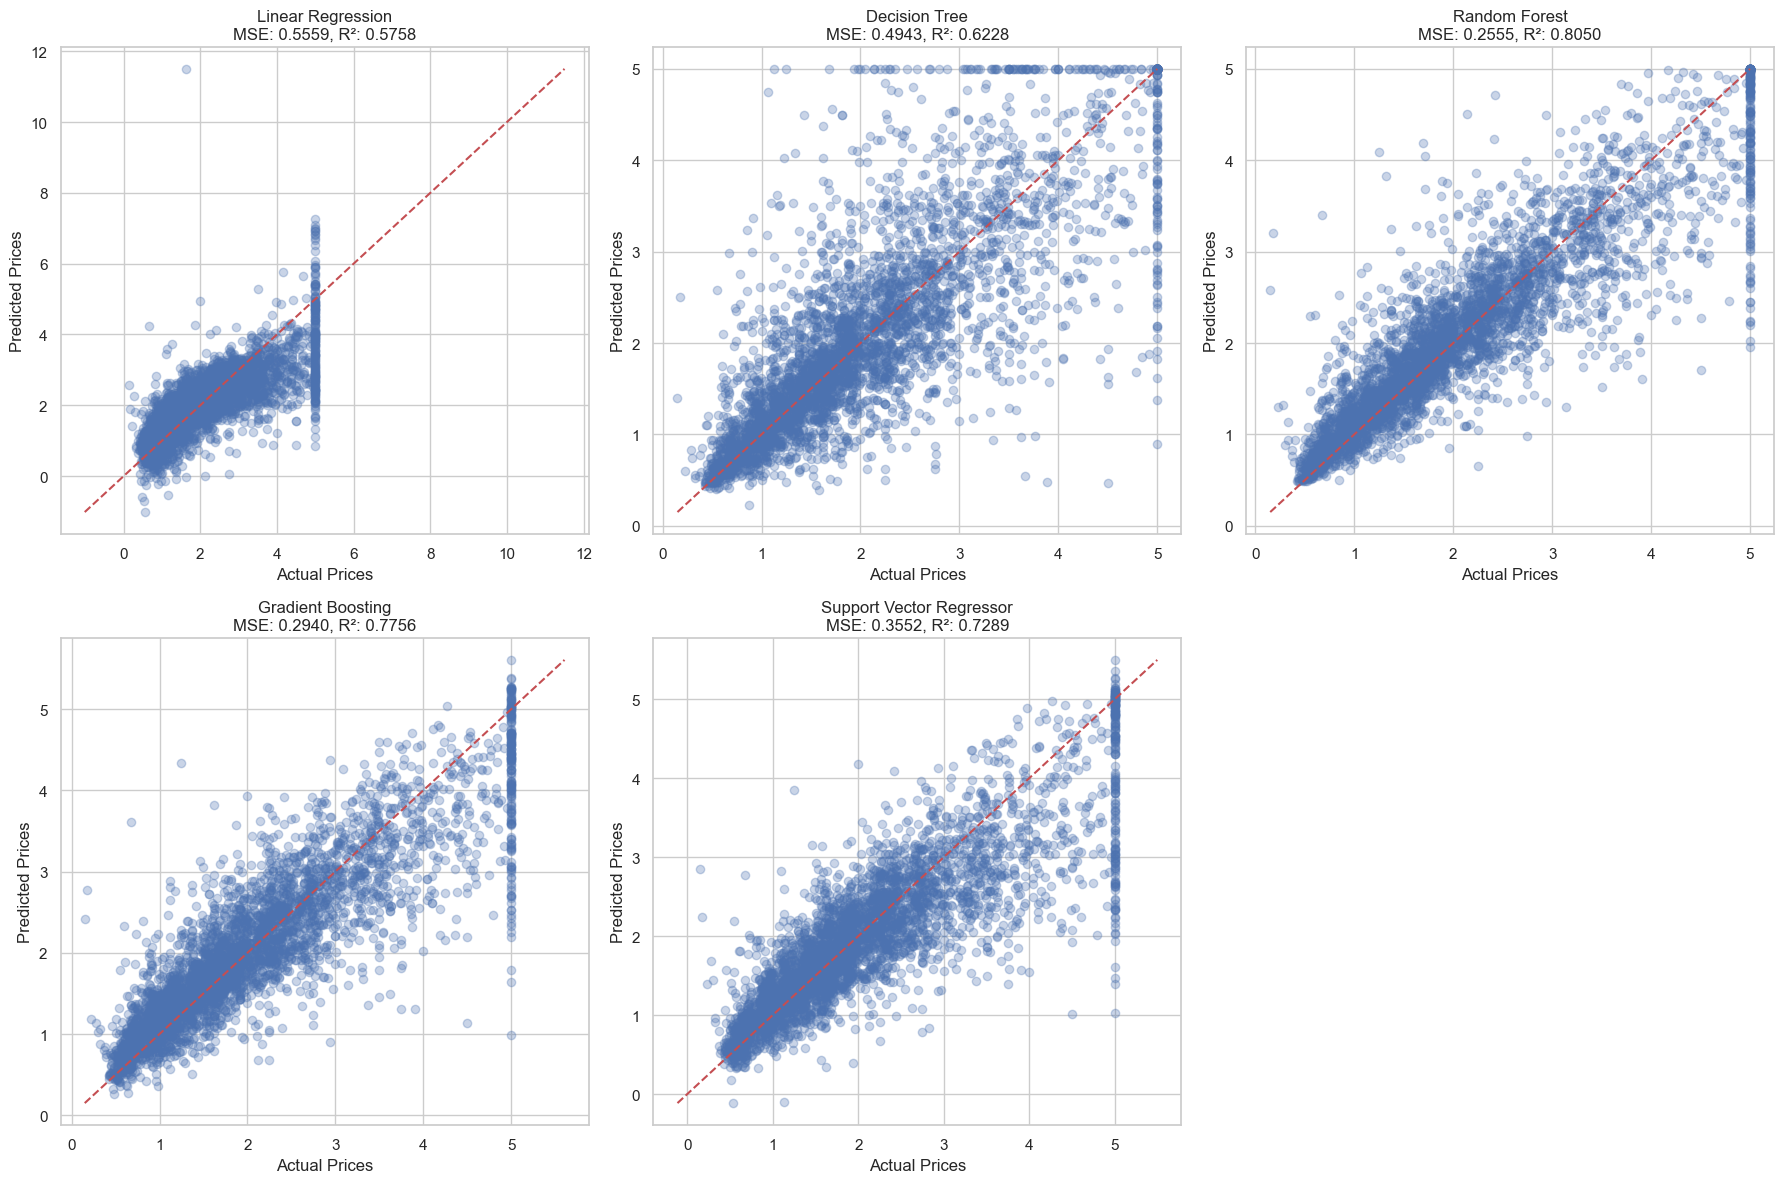

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score
import math

# 1. Load the dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name='MedHouseVal')

# 2. Data Cleaning and Preprocessing
print("Checking for missing values:")
print(X.isnull().sum())

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 3. Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"\nTraining samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# 4. Defining Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR()
}

results = {}

# 5. Training and Prediction
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {
        'model': model,
        'predictions': predictions,
        'MSE': mse,
        'R2': r2
    }
    print(f"{name} trained. MSE: {mse:.4f}, R2: {r2:.4f}\n")

# 6. Evaluating Models
summary = pd.DataFrame({
    'Model': list(results.keys()),
    'Mean Squared Error': [results[m]['MSE'] for m in results],
    'R² Score': [results[m]['R2'] for m in results]
})

print("Model Performance Summary:")
print(summary)

# 7. Visualizing Actual vs Predicted Prices
sns.set(style="whitegrid")
num_models = len(results)
cols = 3
rows = math.ceil(num_models / cols)

plt.figure(figsize=(18, 12))

for idx, (name, res) in enumerate(results.items(), 1):
    plt.subplot(rows, cols, idx)
    plt.scatter(y_test, res['predictions'], alpha=0.3)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'{name}\nMSE: {res["MSE"]:.4f}, R²: {res["R2"]:.4f}')
    max_val = max(y_test.max(), res['predictions'].max())
    min_val = min(y_test.min(), res['predictions'].min())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.tight_layout()
plt.show()
